## Evaluations with baseline clustering methods
This notebook shows the baselines that we use to compare the bias-aware clustering experiment with.
We have two conditions:

1. KMeans without errors as attribute
The number of clusters will be determined with the Silhouette coefficient and elbow method

2. KMeans with errors as attribute
Number of clusters will be determined in the same way as in the first condition.  


In [1]:
# Loading the libraries
from util import *
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
all_data = pd.read_csv(r'..\Preprocessed_datasets\preprocessed_wine.csv', index_col=0)
errors = all_data['errors']
features = all_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)

# Scaling the features 
to_scale = features.columns
features[to_scale] = StandardScaler().fit_transform(features[to_scale])
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001


In [3]:
clus_model_kwargs = {
    "n_clusters": 2,
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}


In [4]:
# 1st condition: Only KMeans, without errors, correct labels and predictions as attribute

km = KMeans(**clus_model_kwargs).fit(features)
print((len(km.labels_)))
features['cluster_results'] = pd.DataFrame(km.predict(features), index=features.index)

features.head()

57


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_results
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507,0
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775,0
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424,0
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727,0
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001,0


## Condition 1. KMeans without recursivity & without errors as attribute


TODO: apply silhouette coefficient and elbow method to find the optimal number of clusters

In [5]:
var_list = []
features_i = features.copy(deep=True)
features["errors"] = errors
for n in range(2, 58):
    km = KMeans(n_clusters=n, init="k-means++", n_init=10, max_iter=300, random_state=2).fit(features_i)
    features['cluster_results'] = pd.DataFrame(km.predict(features_i), index=features.index)
    neg_bias_list = []
    for i in features["cluster_results"].unique():
        neg_bias_list.append(bias_acc(features,i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)


[0.0012755102040816356, 0.016767557321469992, 0.01178193172924637, 0.03496683192076318, 0.011823073825990266, 0.038977693614839506, 0.07925396480081978, 0.041221273283889165, 0.06060034253591855, 0.04069514212453607, 0.062446451209479704, 0.08590753860803983, 0.08951571587239746, 0.09333236705462965, 0.04732451241698853, 0.10941077452954862, 0.11418254963311116, 0.14962762772522462, 0.15151049324551416, 0.12312160657146305, 0.14715353444737886, 0.14152044571581138, 0.1269705869409371, 0.15981672221549204, 0.1419379214336662, 0.17864495963070745, 0.17209265047300398, 0.15559950531942732, 0.1756781005781682, 0.18671112678417973, 0.19440739448198874, 0.19326418771578247, 0.1898622959552535, 0.20239454919837205, 0.19686870899530465, 0.19712928891565668, 0.20554115863777211, 0.21276189773643664, 0.2116685504901496, 0.20988033656820168, 0.21334634568236788, 0.21139841553934127, 0.21575301494756938, 0.21820869498978843, 0.2179090539673706, 0.2166843258284588, 0.21855125561112754, 0.2173781460

Text(0.5, 1.0, 'Negative Bias Variance of Instances')

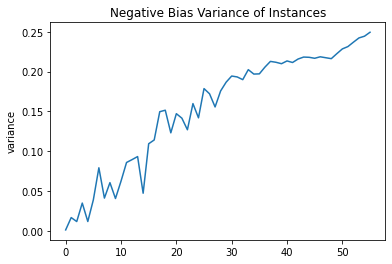

In [6]:
variance_df = pd.DataFrame(var_list).rename(columns={0:"variance"})
# display(variance_df)

# X-axis = number of clusters
sns.lineplot(data=variance_df, x=variance_df.index, y="variance", legend='auto').set_title('Negative Bias Variance of Instances')


## Condition 2. DBSCAN without Recursivity

DBSCAN has two parameters:
- Epsilon: specifies how close points should be to each other to be considered being part of a cluster. The larger the epsilon is, the larger the radius of the cluster is. This means that more data points will fall into this range. 
- Too small eps --> many data points will be considered outliers
- Too large eps --> many non-similar data points will be put in one cluster. 
- Minimum samples: The minimum number of points that can form a dense region. The higher this value is, the more points we require a dense region to have. 

***
Advantages: 
* doesn't require a predefined specification of the number of clusters.
* Clusters are formed based on the density of the data points. 

Disadvantages:
* 
*  

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

[-1  0  1  2]
[-1  0  1  2]
[-1  0  1  2]
[-1  0  1  2]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3  4]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0 -1  1  2  3]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  2  3  4  5  6]
[ 0  1 -1  

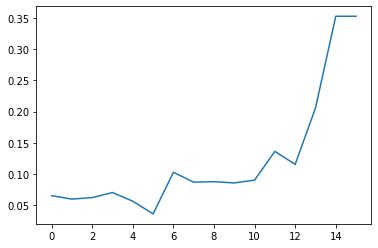

In [8]:
var_list = []
epsilon = 3
minimum_samples = 2
features_i = features.copy(deep=True)
features_i["errors"] = errors

for n in range(2, 58):
    model = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit_predict(features_i)
    features_i['cluster_results'] = pd.DataFrame(model, index=features_i.index)

    neg_bias_list = []
    epsilon = epsilon-0.1
    if  len(features_i["cluster_results"].unique()) == 1:
        print("One cluster left on iteration ", n)
        print("With epsilon", epsilon)
        break
    for i in features_i["cluster_results"].unique():
        print(features_i["cluster_results"].unique())
        #print('features_i', features_i)
        neg_bias_list.append(bias_acc(features_i, i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)

plt.plot(var_list)

The cluster assignments -1 at the DBSCAN algorithm indicate outliers. What should we do with outliers during clustering? If we want to compare DBSCAN with KMeans, we need a method for handling the outliers of DBSCAN, as they affect the clustering process. 
How can we best compare the clusters of KMeans and DBSCAN?

Text(0.5, 1.0, 'Relationship between Negative Bias Variance and epsilon')

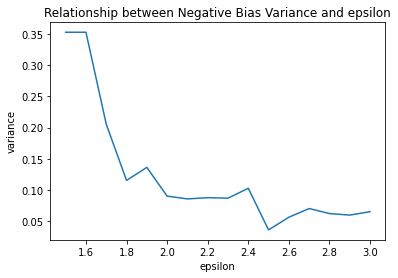

In [9]:
variance_df = pd.DataFrame(var_list).rename(columns={0:"variance"})
variance_df["epsilon"] = pd.DataFrame(np.arange(3.0, 1.3, -0.1))
# display(variance_df)

# X-axis = number of clusters
sns.lineplot(data=variance_df, x="epsilon", y="variance", legend='auto').set_title('Relationship between Negative Bias Variance and epsilon')


## Condition 2. Mean-Shift without errors as attribute

Mean Shift: Similar to KMeans, this clustering method uses centroids as means of a cluster. It has one parameter, which is the bandwidth. This bandwidth is the size of the neighborhood on which we calculate the mean of the datapoints of one cluster. 

Advantage: automatically specifies the number of clusters.
Disadvantage: not suitable for high-dimensional data



Mean-Shift with estimated bandwidth yields an average variance of 0.21  

In [18]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np


[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24 31 32 35 29 34 12 27 22]
[ 4  3 18  0  8  2 25 10  1 13  5 11  7 36 30 16 28 14 21 20  9 19 26 15
 17  6 23 33 24

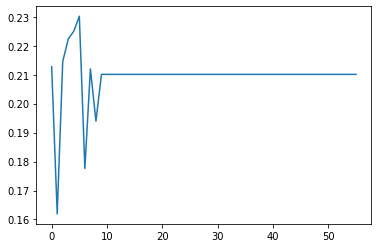

In [26]:
var_list = []

# experimenting with the bandwidth parameter
bw1 = estimate_bandwidth(features_i)
bw2 = None
features_i = features.copy(deep=True)
features_i["errors"] = errors

for n in range(2, 58):
    model = MeanShift(bandwidth=bw1).fit_predict(features_i)
    features_i['cluster_results'] = pd.DataFrame(model, index=features_i.index)
    #features['cluster_results'] = pd.DataFrame(DBSCAN.predict(features_i), index=features.index)
    neg_bias_list = []
    if  len(features_i["cluster_results"].unique()) == 1:
        print("One cluster left on iteration ", n)
        break
    for i in features_i["cluster_results"].unique():
        print(features_i["cluster_results"].unique())
        #print('features_i', features_i)
        neg_bias_list.append(bias_acc(features_i, i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)

plt.plot(var_list)


### Mean-Shift with Bandwidth = None converges very quickly, but gives a lower variance than when we estimated the bandwidth.  

[1 2 0]
[1 2 0]
[1 2 0]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]
[0 2 1]


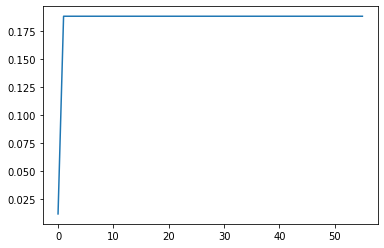

In [24]:
var_list = []

# experimenting with the bandwidth parameter
bw1 = estimate_bandwidth(features_i)
bw2 = None
features_i = features.copy(deep=True)
features_i["errors"] = errors

for n in range(2, 58):
    model = MeanShift(bandwidth=bw2).fit_predict(features_i)
    features_i['cluster_results'] = pd.DataFrame(model, index=features_i.index)
    neg_bias_list = []
    if  len(features_i["cluster_results"].unique()) == 1:
        print("One cluster left on iteration ", n)
        break
    for i in features_i["cluster_results"].unique():
        print(features_i["cluster_results"].unique())
        #print('features_i', features_i)
        neg_bias_list.append(bias_acc(features_i, i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)

plt.plot(var_list)


Text(0.5, 1.0, 'Negative Bias Variance of Instances')

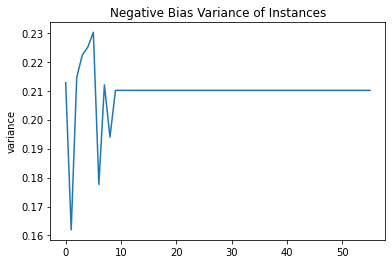

In [27]:
variance_df = pd.DataFrame(var_list).rename(columns={0:"variance"})
# display(variance_df)

# X-axis = number of clusters
sns.lineplot(data=variance_df, x=variance_df.index, y="variance", legend='auto').set_title('Negative Bias Variance of Instances')

## Condition 3. Affinity Propagation without errors as attribute


Affinity Propagation parameters:
* Damping:
* Maximum iterations:
* Convergence iterations:
* Preference
* Affinity: euclidean

In [83]:
from sklearn.cluster import AffinityPropagation
import numpy as np

In [12]:
var_list = []
epsilon = 3
minimum_samples = 2
features_i = features.copy(deep=True)
features_i["errors"] = errors

for n in range(2, 58):
    model = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit_predict(features_i)
    features_i['cluster_results'] = pd.DataFrame(model, index=features_i.index)
    #features['cluster_results'] = pd.DataFrame(DBSCAN.predict(features_i), index=features.index)
    neg_bias_list = []
    epsilon = epsilon-0.1
    if  len(features_i["cluster_results"].unique()) == 1:
        print("One cluster left on iteration ", n)
        print("With epsilon", epsilon)
        break
    for i in features_i["cluster_results"].unique():
        print(features_i["cluster_results"].unique())
        #print('features_i', features_i)
        neg_bias_list.append(bias_acc(features_i, i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)

plt.plot(var_list)


In [37]:
var_list = []
features_i = features.copy(deep=True)
features["errors"] = errors
for n in range(2, 58):
    model = AffinityPropagation()
    affin = model(n_clusters=10, linkage='average', affinity='euclidean' .fit_predict(features_i)
    features['cluster_results'] = pd.DataFrame(agglom.predict(features_i, index=features.index)
    neg_bias_list = []
    for i in features["cluster_results"].unique():
        neg_bias_list.append(bias_acc(features,i,"cluster_results"))
    var_list.append(neg_bias_list)
print(var_list)



AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
var_list = []
features_i = features.copy(deep=True)
features["errors"] = errors
for n in range(2, 58):
    model = AffinityPropagation()
    affin = model(n_clusters=10, linkage='average', affinity='euclidean').fit_predict(features_i)
    features['cluster_results'] = pd.DataFrame(agglom.predict(features_i), index=features.index)
    neg_bias_list = []
    for i in features["cluster_results"].unique():
        neg_bias_list.append(bias_acc(features,i,"cluster_results"))
    var_list.append(neg_bias_list)
print(var_list)